In [27]:
#import required python modules
import sys
import os
import numpy as np
from scipy.constants import c,pi
import matplotlib.pyplot as plt

In [32]:
#specify path to ADC data

data_path = os.getcwd() + "/MATLAB Code/Sample_Data/adc_data.bin"


#configuration information
num_frames = 8
chirps_per_frame = 128
rx_channels = 4
samples_per_chirp = 256

#chirp bandwidth
chirp_BW_MHz_us = 767.54*1e6

#number of angle bins
num_angle_bins = 64

#COMPUTED VALUES compute range bins
range_res = c / (2 * chirp_BW_MHz_us)
ranges = np.arange(0,samples_per_chirp) * range_res

phase_shifts = np.arange(-1 * pi,pi  + 2 * pi /(num_angle_bins - 1),2 * pi / (num_angle_bins-1))
angle_bins = np.arcsin(phase_shifts / pi)
thetas,rhos = np.meshgrid(angle_bins,ranges)
x_s = np.multiply(rhos,np.cos(thetas))
y_s = np.multiply(rhos,np.sin(thetas))

print(np.min(x_s))
print(np.cos(np.min(thetas)))

0.0
6.123233995736766e-17


In [29]:
#import the raw data
LVDS_lanes = 4
adc_data = np.fromfile(data_path,dtype=np.int16)

#reshape to get the real and imaginary parts
adc_data = np.reshape(adc_data, (LVDS_lanes * 2,-1),order= "F")

#convert into a complex format
adc_data = adc_data[0:4,:] + 1j * adc_data[4:,:]

#reshape to index as [rx channel, sample, chirp, frame]
adc_data_cube = np.reshape(adc_data,(rx_channels,samples_per_chirp,chirps_per_frame,num_frames),order="F")


In [30]:
#plot the AoA heat map for a given chirp in a given frame

frame = 0
chirp = 0

#get range angle cube
data = np.zeros((samples_per_chirp,num_angle_bins),dtype=complex)
data[:,0:rx_channels] = np.transpose(adc_data_cube[:,:,chirp,frame])

#compute Range FFT
data = np.fft.fftshift(np.fft.fft(data,axis=0))

#compute range response

data = 20* np.log10(np.abs(np.fft.fftshift(np.fft.fft(data,axis=-1))))


/tmp/ipykernel_38711/4101112163.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axs[1].pcolormesh(x_s,y_s,data)


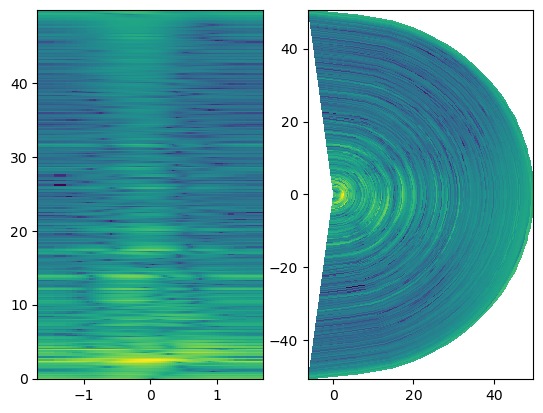

In [31]:
#initialize the subfigures
fig,axs = plt.subplots(nrows=1,ncols=2)

#plot polar coordinates
axs[0].pcolormesh(thetas,rhos,data)

#convert polar to cartesian
axs[1].pcolormesh(x_s,y_s,data)

plt.show()